Problem Statement: Concrete Strength Prediction
Objective
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# read data set
df = pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29


1. Univariate analysis – data types and description of the independent attributes
which should include (name, range of values observed, central values (mean and
median), standard deviation and quartiles, analysis of the body of distributions /
tails, missing values, outliers, duplicates

In [3]:
# check counts,datatype,total number of rows etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
# count of total rows and columns
#df.shape
# No null values but incase of nulls/ get null count
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [5]:
# statistical information of the columns total count,mean,max,standard deviation etc.
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,"1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00"
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.45
75%,350.00,142.95,118.30,192.00,10.20,"1,029.40",824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,"1,145.00",992.60,365.00,82.60


In [6]:
# check skewness of the columns
df.skew()

cement          0.51
slag            0.80
ash             0.54
water           0.07
superplastic    0.91
coarseagg      -0.04
fineagg        -0.25
age             3.27
strength        0.42
dtype: float64

Only age of the concrete looks highly skewed 

<function matplotlib.pyplot.show(*args, **kw)>

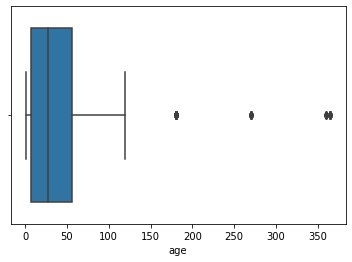

In [7]:
# lets see concerete age column for the outliers, it looks highly skewed
sns.boxplot(df['age'])
plt.show

concrete age med is about 45 years, and data points after 120 years are outliers

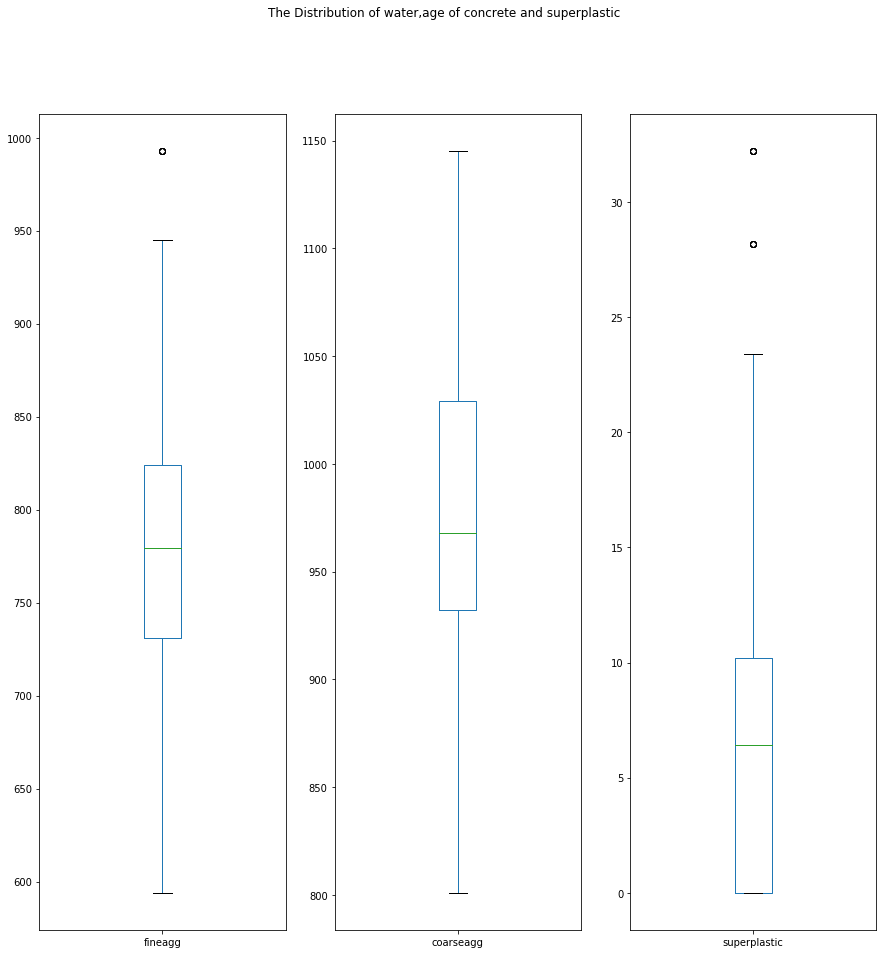

In [8]:
# binning of age column
# lets see concerete age column for the outliers, it looks highly skewed
# Check Outliers
dist_Conc_Str = df[['fineagg','coarseagg','superplastic']].plot(kind = 'box', 
                                                      figsize = (15,15),
                                                      subplots = True, layout = (1,3),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of water,age of concrete and superplastic')

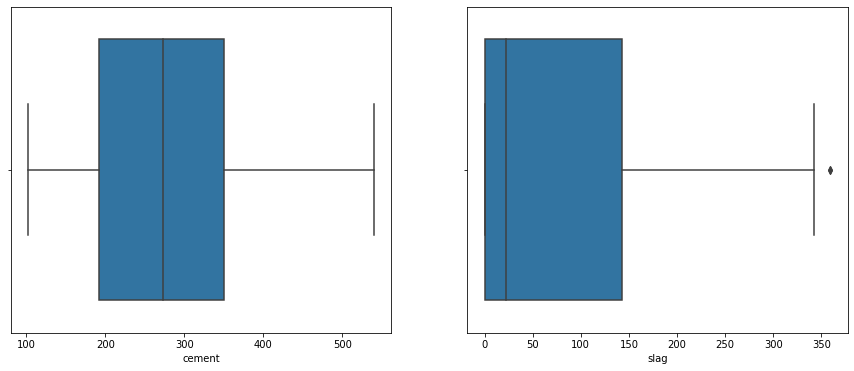

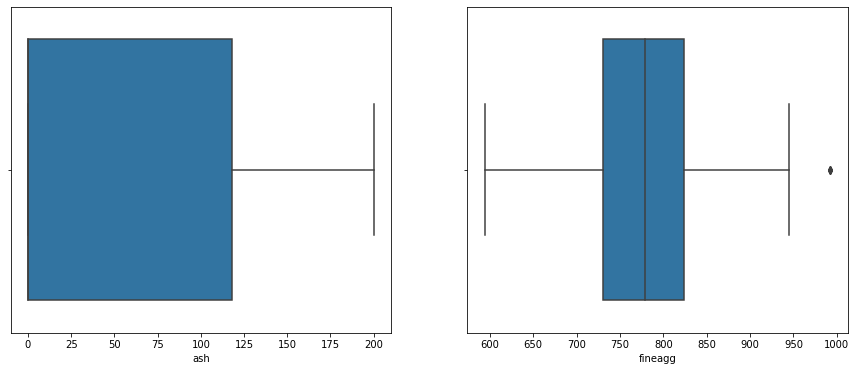

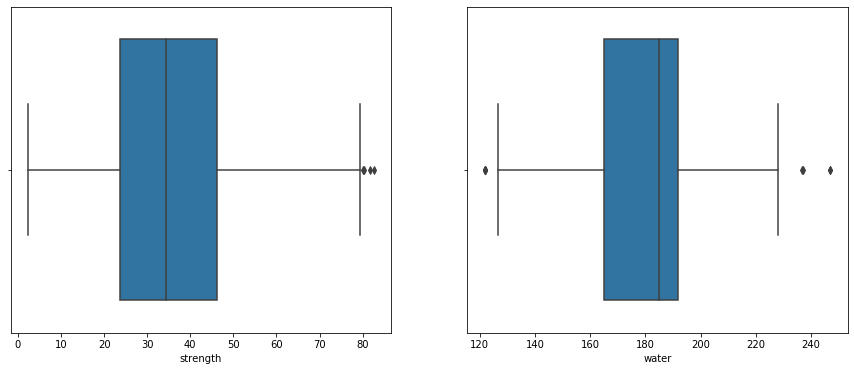

In [9]:
fig, (a,b,)= plt.subplots(1,2,figsize=(15,6))
sns.boxplot(df['cement'],ax=a)
sns.boxplot(df['slag'],ax=b)

fig, (a,b,)= plt.subplots(1,2,figsize=(15,6))
sns.boxplot(df['ash'],ax=a)
sns.boxplot(df['fineagg'],ax=b)

fig, (a,b,)= plt.subplots(1,2,figsize=(15,6))
sns.boxplot(df['strength'],ax=a)
sns.boxplot(df['water'],ax=b)

plt.show()

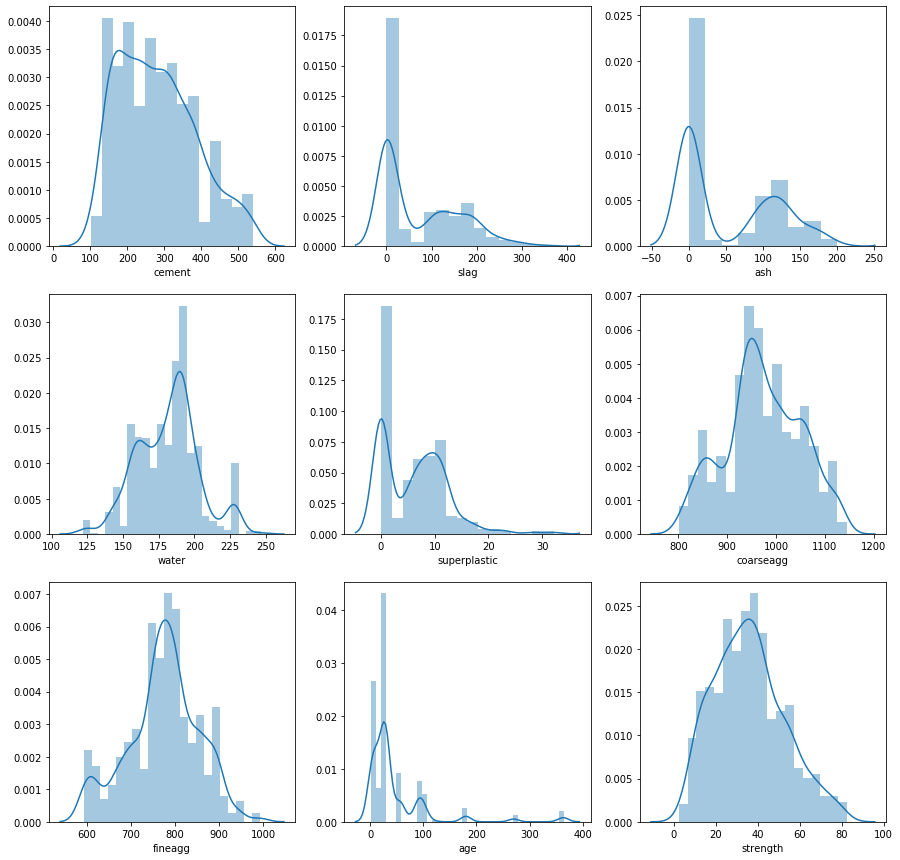

In [10]:
plt.figure(figsize=(15,15))
pos = 1
for i in df.columns:
    plt.subplot(3, 3, pos)
    sns.distplot(df[i])
    pos += 1

Data looks normally distributed, but some of the variables having outliers (like : age, superplastic,fineagg,ash)

Bi-variate analysis between the predictor variables and between the predictor
variables and target column. Comment on your findings in terms of their
relationship and degree of relation if any. Visualize the analysis using boxplots and
pair plots, histograms or density curves. (10 marks)

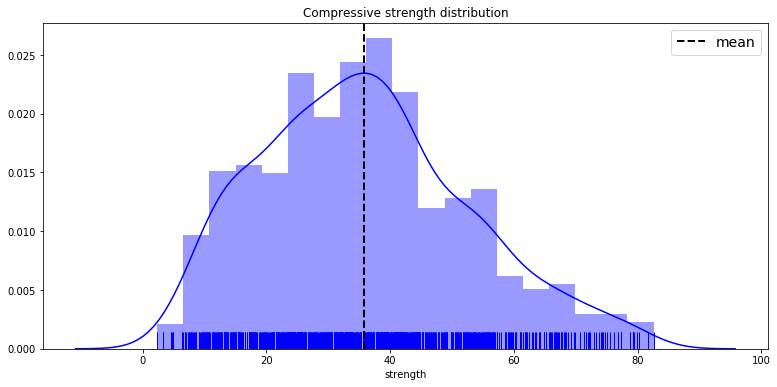

In [11]:
# Target column distribution
plt.figure(figsize=(13,6))
sns.distplot(df["strength"],color="b",rug=True)
plt.axvline(df["strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressive strength distribution")
plt.show()

Target column Normaly distributed

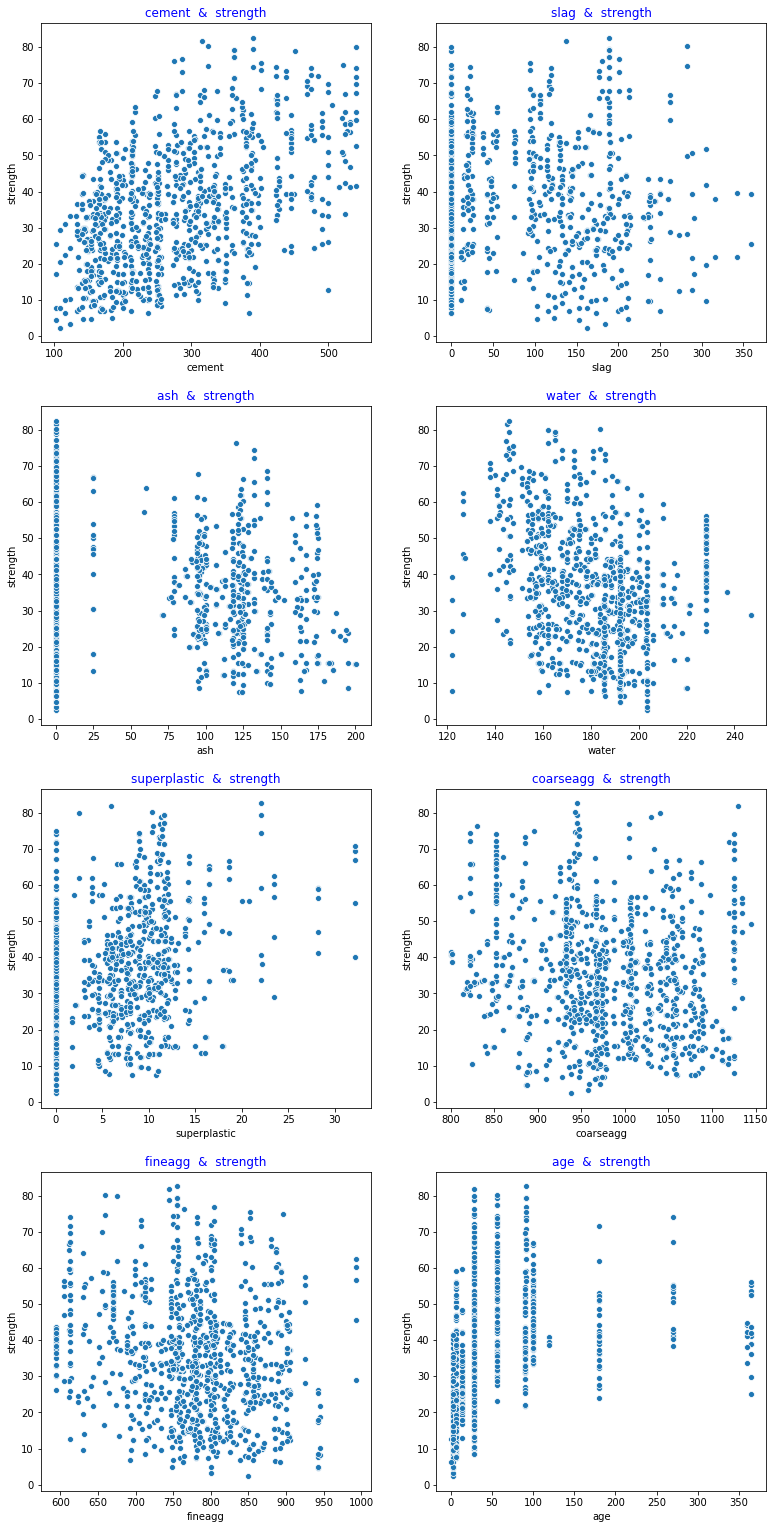

In [12]:
# Bi-variate analysis against the target column
cols = [i for i in df.columns if i not in 'strength']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.scatterplot(df[i], df["strength"])
    plt.title(i+"  &  strength",color="blue")

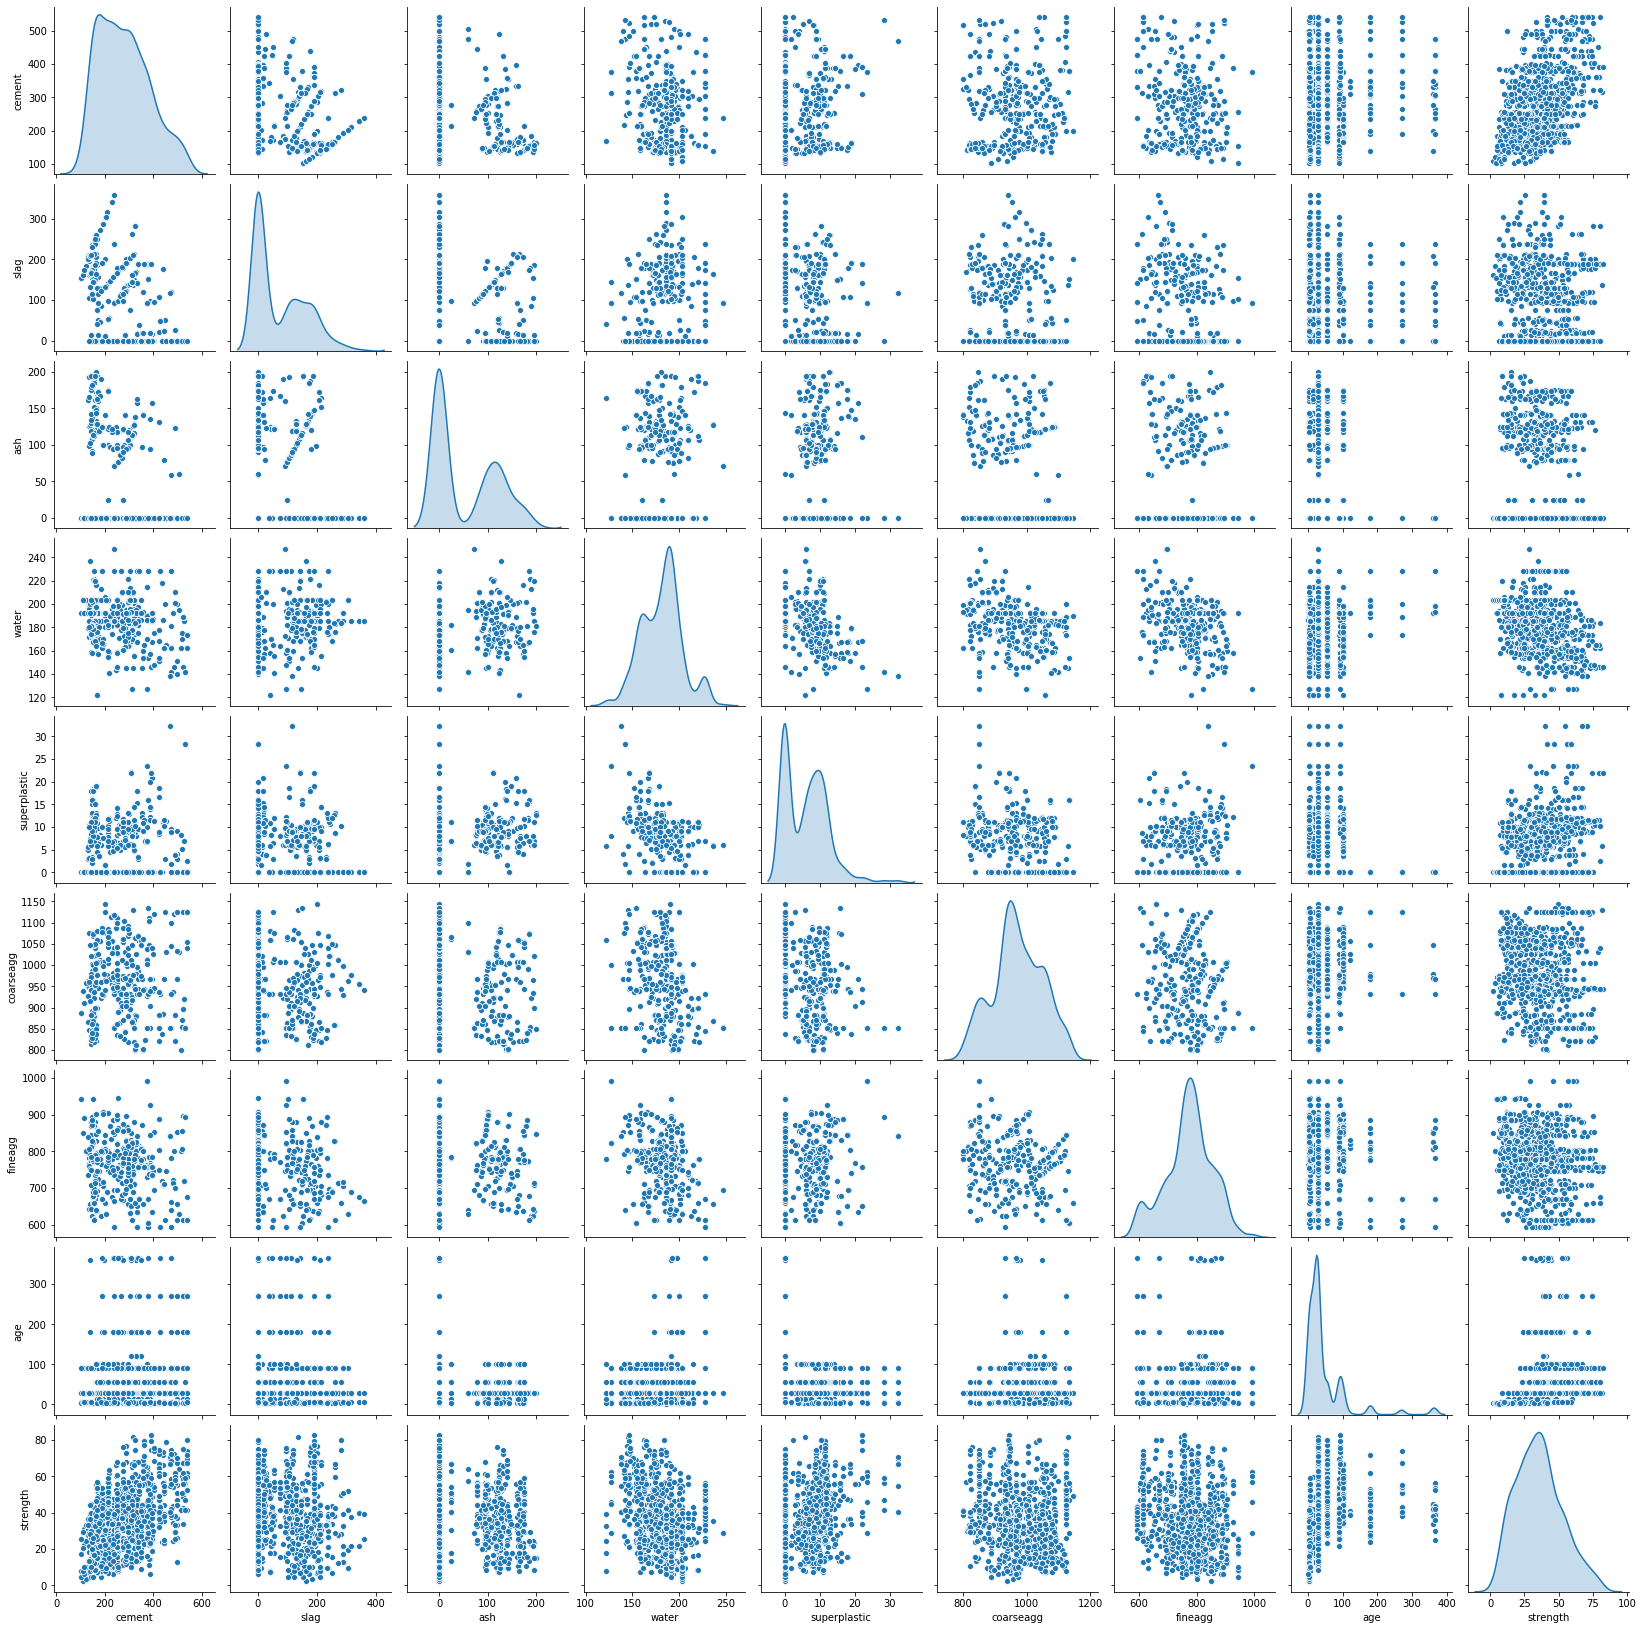

In [13]:
sns.pairplot(df,diag_kind = 'kde');

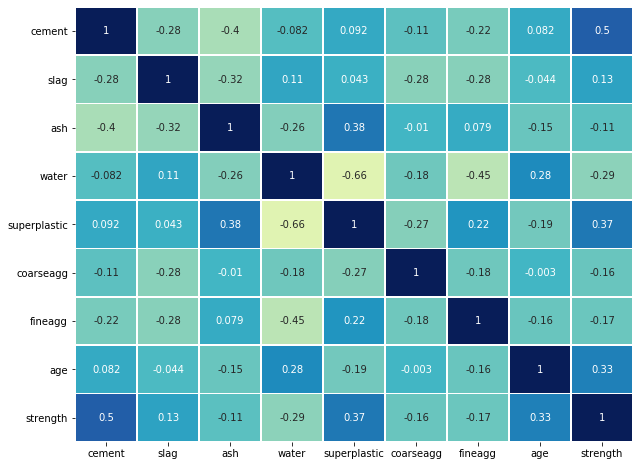

In [14]:
# Co-relation among the variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu") #YlGnBu
plt.show()

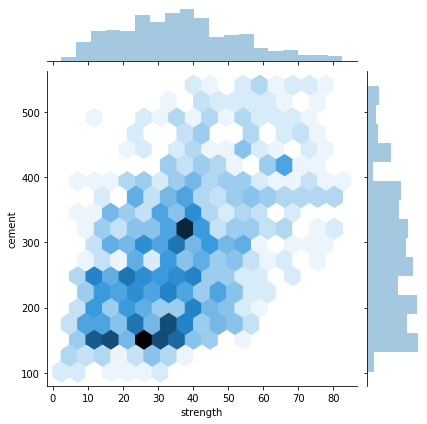

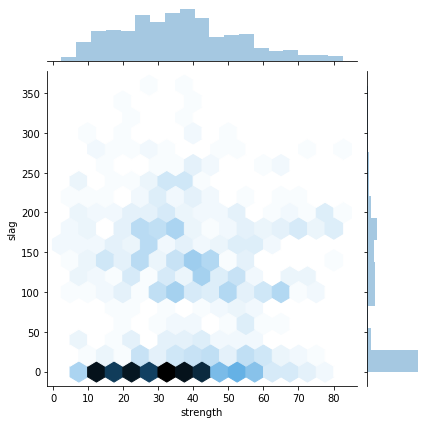

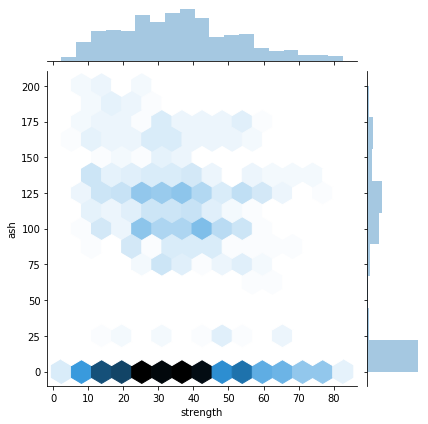

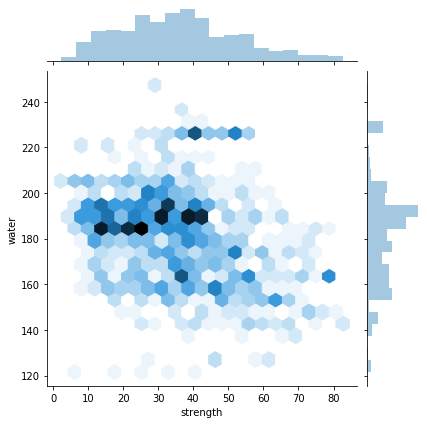

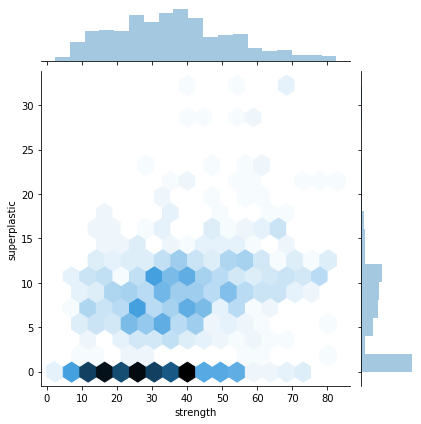

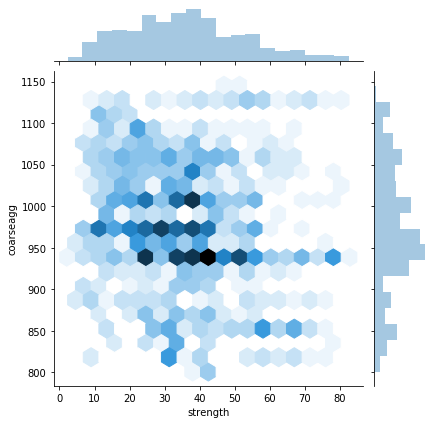

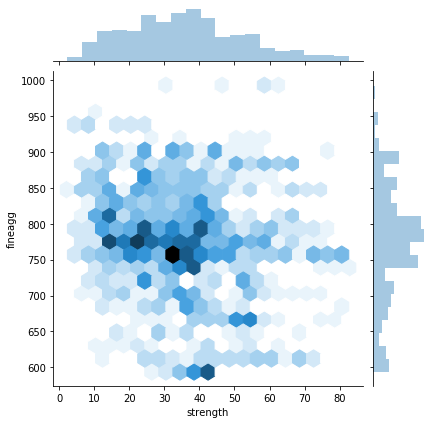

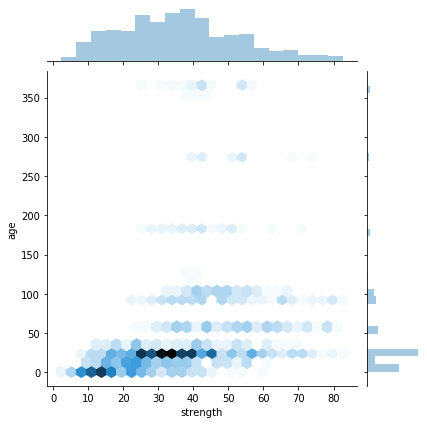

In [15]:
for i in ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']:
    sns.jointplot(x='strength',y=i,data=df,kind='hex')
    plt.show()

Based on the multvariate plots,comparision against target column plot and co-relation plot noticed : NO strong relationship amongs variables, it may be because of outliers.

In [16]:
# Find median values for the outliers
df.median()

cement         272.90
slag            22.00
ash              0.00
water          185.00
superplastic     6.40
coarseagg      968.00
fineagg        779.50
age             28.00
strength        34.45
dtype: float64

In [17]:
# Anything above below output values are outliers per column
print('cement above : ', df['cement'].quantile(q = 0.75) + 1.5*(df['cement'].quantile(q = 0.75) - df['cement'].quantile(q = 0.25)), 'are outliers')
print('slag above : ', df['slag'].quantile(q = 0.75) +1.5*(df['slag'].quantile(q = 0.75) - df['slag'].quantile(q = 0.25)), 'are outliers')

print('ash above : ', df['ash'].quantile(q = 0.75) + 	1.5*(df['ash'].quantile(q = 0.75) - df['ash'].quantile(q = 0.25)), 'are outliers')

print('water above : ', df['water'].quantile(q = 0.75) +  1.5*(df['water'].quantile(q = 0.75) - df['water'].quantile(q = 0.25)), 'are outliers')

print('superplastic above : ', df['superplastic'].quantile(q = 0.75) +  1.5*(df['superplastic'].quantile(q = 0.75) - df['superplastic'].quantile(q = 0.25)), 'are outliers')
print('coarseagg above : ', df['coarseagg'].quantile(q = 0.75) +  1.5*(df['coarseagg'].quantile(q = 0.75) - df['coarseagg'].quantile(q = 0.25)), 'are outliers')
print('fineagg above : ', df['fineagg'].quantile(q = 0.75) +  1.5*(df['fineagg'].quantile(q = 0.75) - df['fineagg'].quantile(q = 0.25)), 'are outliers')
print('age above : ', df['age'].quantile(q = 0.75) +  1.5*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)), 'are outliers')
print('strength above : ', df['strength'].quantile(q = 0.75) +  1.5*(df['strength'].quantile(q = 0.75) - df['strength'].quantile(q = 0.25)), 'are outliers')

cement above :  586.4375 are outliers
slag above :  357.375 are outliers
ash above :  295.75 are outliers
water above :  232.64999999999998 are outliers
superplastic above :  25.5 are outliers
coarseagg above :  1175.5000000000002 are outliers
fineagg above :  963.575 are outliers
age above :  129.5 are outliers
strength above :  79.77250000000001 are outliers


In [18]:
# outlier treatment
print('Number of records: ', len(df))

Number of records:  1030


In [19]:
print('Outliers for cement column:', round(df[df['cement'] > 586.4375]['cement'].count()*100/len(df),2), '%')
print('Outliers for slag column:', round(df[df['slag'] > 357.375]['slag'].count()*100/len(df),2), '%')
print('Outliers for ash column:', round(df[df['ash'] > 295.75]['ash'].count()*100/len(df),2), '%')
print('Outliers for water column:', round(df[df['water'] > 232.64999999999998]['water'].count()*100/len(df),2), '%')
print('Outliers for superplastic column:', round(df[df['superplastic'] > 25.75]['superplastic'].count()*100/len(df),2), '%')
print('Outliers for coarseagg column:', round(df[df['coarseagg'] > 1175.5000000000002]['coarseagg'].count()*100/len(df),2), '%')
print('Outliers for fineagg column:', round(df[df['fineagg'] > 968.8249999999998]['fineagg'].count()*100/len(df),2), '%')
print('Outliers for age column:', round(df[df['age'] > 129.5]['age'].count()*100/len(df),2), '%')
print('Outliers for strength column:', round(df[df['strength'] > 75.6575]['strength'].count()*100/len(df),2), '%')

Outliers for cement column: 0.0 %
Outliers for slag column: 0.19 %
Outliers for ash column: 0.0 %
Outliers for water column: 0.39 %
Outliers for superplastic column: 0.97 %
Outliers for coarseagg column: 0.0 %
Outliers for fineagg column: 0.49 %
Outliers for age column: 5.73 %
Outliers for strength column: 1.55 %


Outliers exists in age,superplastic,fineagg,slag,water and strength columns

In [20]:
# replacing outliers with median value
df[df['age'] > 129.5] = 28.000
df[df['strength'] > 75.6575] = 34.445
df[df['fineagg'] > 968.8249999999998] = 779.500
df[df['superplastic'] > 25.75] = 6.400
df[df['water'] > 232.64999999999998] = 185.000
df[df['slag'] > 357.375] = 22.000

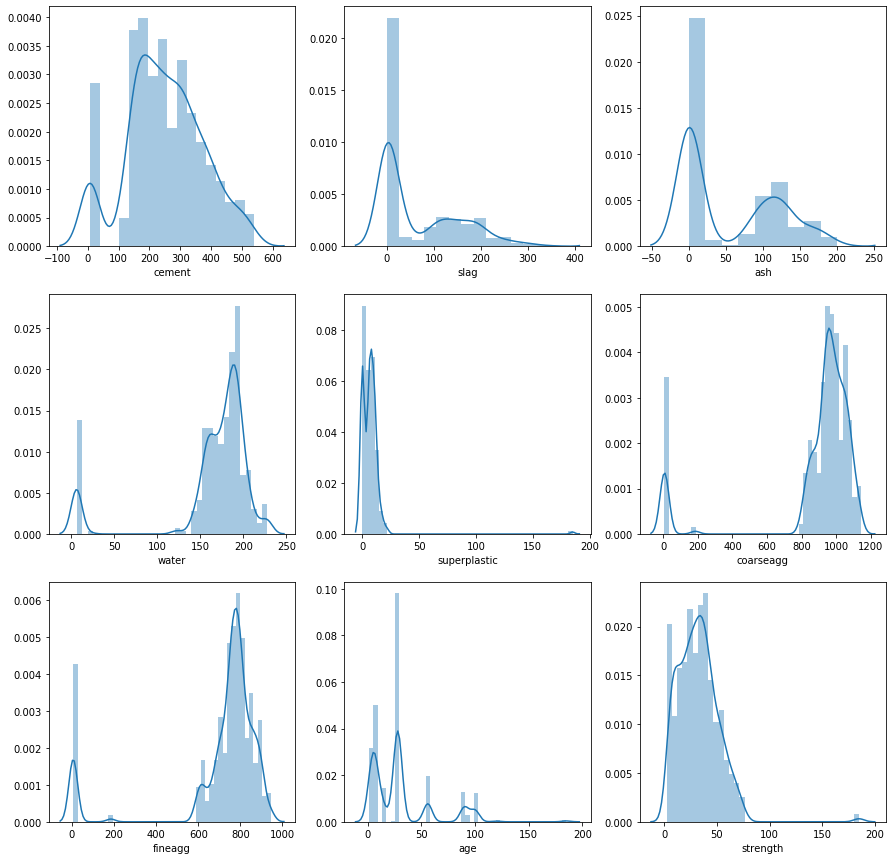

In [21]:
plt.figure(figsize=(15,15))
pos = 1
for i in df.columns:
    plt.subplot(3, 3, pos)
    sns.distplot(df[i])
    pos += 1

Now Variables look more normally distributed than before, ignoring outliers which are created because of outlier treatment.

This is a regression problem with all numerical columns involved of different metrics, will scale them.
Droping Target column, because do not want to scale target column "strength"

Feature Engineering techniques (10 marks)
a. Identify opportunities (if any) to extract a new feature from existing features, drop a feature (if required)
b. Get data model ready and do a train test split.
c. Check for higher degree attributes, should it be linear, quadratic or higher degree? Use Polynomial Features (Consider degree 2 and 3).

In [22]:
df_new = df.drop(['strength'], axis =1)
df_new.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28.00
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14.00
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28.00
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28.00
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28.00


In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   float64
dtypes: float64(8)
memory usage: 64.5 KB


In [24]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(scaled, columns = df_new.columns)
df_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-0.88,1.73,-0.86,0.73,-0.57,0.30,0.18,-0.08
1,-0.66,-0.29,1.08,-0.13,0.32,0.67,0.39,-0.55
2,0.00,-0.80,0.64,0.42,-0.12,0.24,0.67,-0.08
3,0.13,0.56,-0.86,1.19,-0.57,0.16,-0.15,-0.08
4,-0.77,1.38,-0.86,0.53,0.18,0.56,-0.04,-0.08


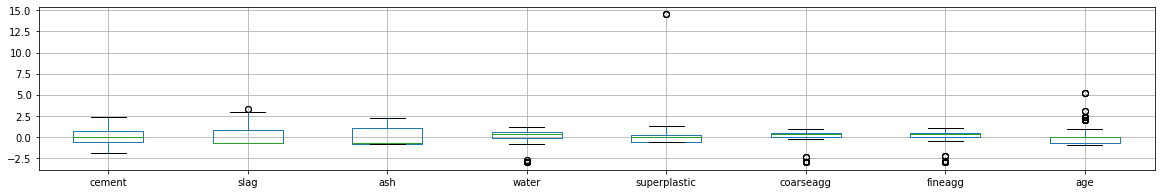

In [25]:
df_scaled.boxplot(figsize=(20,3));

In [26]:
# split data into training and test data
df['strength'] = df['strength'].astype(float)

In [27]:
X = df_scaled
y = df['strength']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [29]:
# MOdel comparison
col_names =  ['Model Type', 'Training Score', 'Test Score']
model_comparison  = pd.DataFrame(columns = col_names)
model_comparison

,Model Type,Training Score,Test Score


In [30]:
# 1.Linear Regression
# 1.1 Normal Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
linear_model.score(X_train, y_train)

0.8589393691970948

In [32]:
linear_model.score(X_test, y_test)

0.8262337956509732

In [33]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression', round(linear_model.score(X_train, y_train)*100,2), round(linear_model.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62


In [34]:
# Finding out the importance of features
feature_importances = linear_model.coef_.ravel()
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[13.85002394  6.71887939  3.04567375 -6.93980185  7.07409877  0.91363433
  0.82868715  8.62881501]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

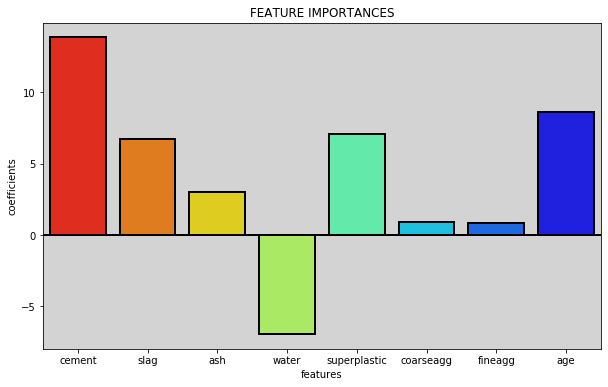

In [35]:
# Plotting the feature importance metric for better visualisation
plt.figure(figsize=(10,6))
coef = pd.DataFrame(linear_model.coef_.ravel())
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
        linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

In [36]:
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
r2Score = r2_score(y_test, y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))

The Root Mean Sq Error is 7.9947997871366345 and R^2 error is 0.8262337956509732


In [37]:
b1 = linear_model.coef_
b0 = linear_model.intercept_
print("b1 is: {} and b0 is: {}".format(b1, b0))

b1 is: [13.85002394  6.71887939  3.04567375 -6.93980185  7.07409877  0.91363433
  0.82868715  8.62881501] and b0 is: 32.60648655012786


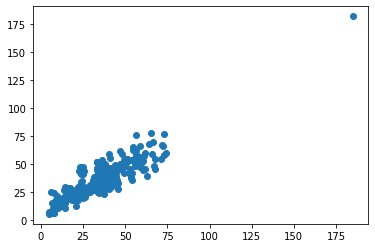

In [38]:
# predictfor a set of attributes not in the training or test set
y_pred = linear_model.predict(X_test)
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test, y_pred)

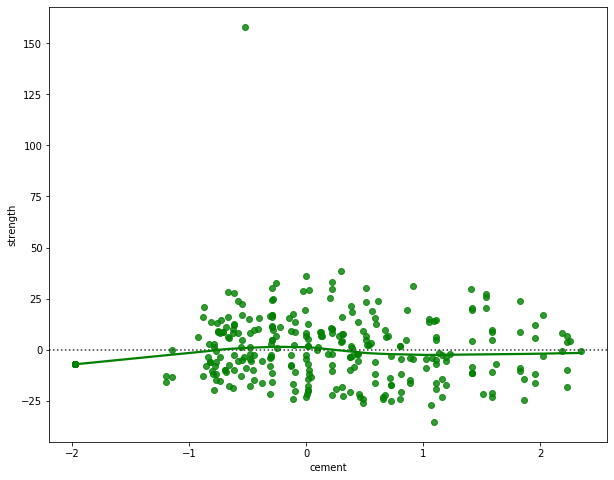

In [39]:
# Is OLS a good model ? Should we building a simple linear model ? Check the residuals for few predictor.
fig = plt.figure(figsize=(10,8))
sns.residplot(x= X_test['cement'], y= y_test, color='green', lowess=True )

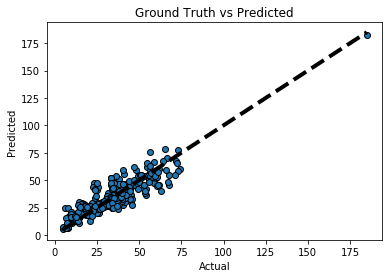

In [40]:
y_pred = linear_model.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [41]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
299,-0.42,0.78,-0.86,0.51,-0.57,0.32,0.51,-0.92,9.13
667,0.03,-0.80,-0.86,0.62,-0.57,0.28,0.67,-0.92,9.31
803,0.19,0.45,0.42,0.85,0.17,0.06,-0.11,-0.08,37.17
375,-0.88,1.73,-0.86,0.73,-0.57,0.30,0.18,-0.92,4.83
199,-1.97,-0.72,-0.76,-3.00,-0.04,-3.04,-3.00,-0.81,6.40


In [42]:
lm1 = smf.ols(formula= 'strength ~ cement + slag + ash + superplastic + fineagg + age', data = data_train).fit()
lm1.params
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     591.0
Date:                Sat, 26 Sep 2020   Prob (F-statistic):          5.15e-273
Time:                        01:53:19   Log-Likelihood:                -2529.7
No. Observations:                 721   AIC:                             5073.
Df Residuals:                     714   BIC:                             5105.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       32.5394      0.303    107.379   

In [43]:
# 1.2 Linear regression with tunning
X_drop = df_scaled.drop(['water','coarseagg'], axis =1)
y_drop = df['strength']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y_drop, test_size = 0.3, random_state = 11)

In [45]:
linear_model_drop = LinearRegression()
linear_model_drop.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
print(linear_model_drop.score(X_train, y_train))
print(linear_model_drop.score(X_test, y_test))

0.8324033390744506
0.8020123653345191


In [47]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression (Column Drop)', round(linear_model_drop.score(X_train, y_train)*100,2), round(linear_model_drop.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20


Score dropped when dropped column

In [48]:
# 1.3 Polynomial Degree 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [49]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)

In [50]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=11)

In [51]:
linear_model_poly2 = LinearRegression()
linear_model_poly2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print(linear_model_poly2.score(X_train, y_train))
print(linear_model_poly2.score(X_test, y_test))

0.8908173219735624
0.8250926377893876


In [53]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression (Polynomial = 2)', round(linear_model_poly2.score(X_train, y_train)*100,2), round(linear_model_poly2.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51


In [54]:
# 1.4 Poyomial degree 3
poly = PolynomialFeatures(degree = 3, interaction_only = True)

In [55]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=11)

In [56]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
print(linear_model.score(X_train, y_train))
print(linear_model.score(X_test, y_test))

0.9112488467998282
0.7937127914633044


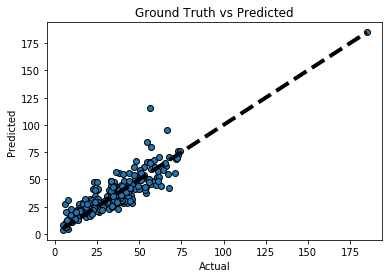

In [58]:
y_pred = linear_model.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [59]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression (Polynomial = 3)', round(linear_model.score(X_train, y_train)*100,2), round(linear_model.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51
3,Linear Regression (Polynomial = 3),91.12,79.37


1. Algorithms that you think will be suitable for this project. Use Kfold Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics.
(at least 3 algorithms, one bagging and one boosting based algorithms has to be there). (15 marks)
2. Techniques employed to squeeze that extra performance out of the model without making it over fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

Linear Regression with polynomial degree 3 looks overfit on test data

In [60]:
# Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [61]:
dt_model = DecisionTreeRegressor(criterion='mse', random_state = 11)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=11, splitter='best')

In [62]:
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

0.9962960572172174
0.8832507015230482


In [63]:
y_pred = dt_model.predict(X_test)

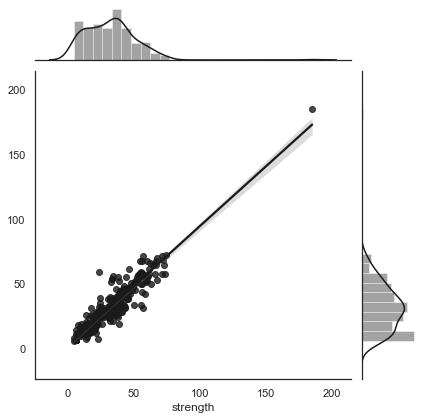

In [64]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [65]:
model_comparison.loc[len(model_comparison)] = 'Decision Tree Regressor', round(dt_model.score(X_train, y_train)*100,2), round(dt_model.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51
3,Linear Regression (Polynomial = 3),91.12,79.37
4,Decision Tree Regressor,99.63,88.33


In [66]:
# feature importance
feature_importances = dt_model.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.27935455 0.05224447 0.00722723 0.07866326 0.01138831 0.02186434
 0.23626524 0.31299259]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

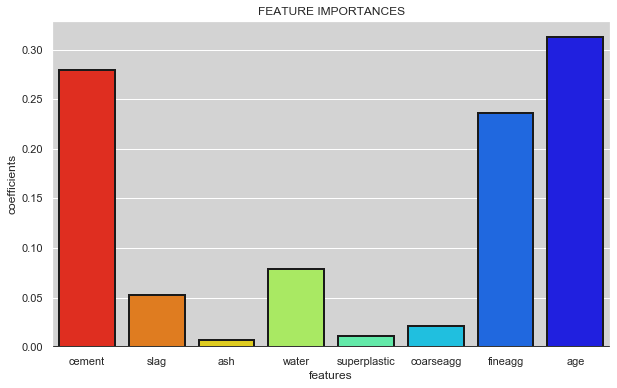

In [67]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(dt_model.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

In [68]:
# decision tree with hyper param tuning 
X_drop = df_scaled.drop(['ash','superplastic'], axis =1)
y_drop = df['strength']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_drop, y_drop, test_size = 0.3, random_state = 11)

In [70]:
# Dropping the least correlated columns as per above graph
dt_model = DecisionTreeRegressor(criterion='mse', max_depth = 9, min_samples_split = 5, random_state = 11)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=11, splitter='best')

In [71]:
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

0.9654182844042967
0.8725552587141606


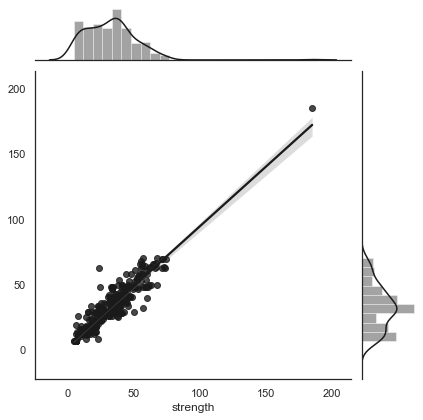

In [72]:
y_pred = dt_model.predict(X_test)
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [73]:
model_comparison.loc[len(model_comparison)] = 'Decision Tree Regressor (Tuned)', round(dt_model.score(X_train, y_train)*100,2), round(dt_model.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51
3,Linear Regression (Polynomial = 3),91.12,79.37
4,Decision Tree Regressor,99.63,88.33
5,Decision Tree Regressor (Tuned),96.54,87.26


Model Performance at 95% confidence level

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [75]:
dt_model = DecisionTreeRegressor(criterion='mse', max_depth = 9, min_samples_split = 5, random_state = 11)

In [76]:
seed = 11
results = cross_val_score(dt_model, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.86845895 0.17366767 0.77845    0.68199602 0.30960202 0.81929064
 0.81383101 0.80464372 0.75996815 0.5481226  0.81121356 0.77822414
 0.84151897 0.60855464 0.90176887 0.43949664 0.82492927 0.89036922
 0.76676152 0.91404794]
Accuracy: 71.675% (19.762%)


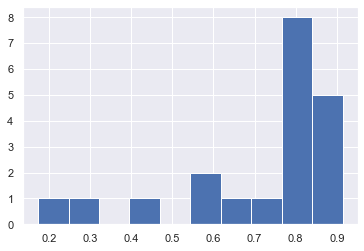

95.0 confidence interval 23.8% and 90.8%


In [77]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [78]:
# K Nearest Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [79]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [80]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8915955308309433
0.815198275203568


In [81]:
model_comparison.loc[len(model_comparison)] = 'KNN Regressor', round(knn.score(X_train, y_train)*100,2), round(knn.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51
3,Linear Regression (Polynomial = 3),91.12,79.37
4,Decision Tree Regressor,99.63,88.33
5,Decision Tree Regressor (Tuned),96.54,87.26
6,KNN Regressor,89.16,81.52


In [82]:
# K Nearest Regressor with Hyper Parameter Tuning
parameters = { 'n_neighbors': [2,3,4,7],
 'weights': ['uniform', 'distance']}
knn_cv = GridSearchCV(KNeighborsRegressor(), param_grid = parameters, cv = 10)

In [83]:
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 7],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [84]:
knn_cv.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [85]:
print(knn_cv.score(X_train, y_train))
print(knn_cv.score(X_test, y_test))

0.9962960572172174
0.8606529312114148


In [86]:
model_comparison.loc[len(model_comparison)] = 'KNN Regressor Tuned', round(knn.score(X_train, y_train)*100,2), round(knn.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51
3,Linear Regression (Polynomial = 3),91.12,79.37
4,Decision Tree Regressor,99.63,88.33
5,Decision Tree Regressor (Tuned),96.54,87.26
6,KNN Regressor,89.16,81.52
7,KNN Regressor Tuned,89.16,81.52


In [87]:
y_pred = knn_cv.predict(X_test)

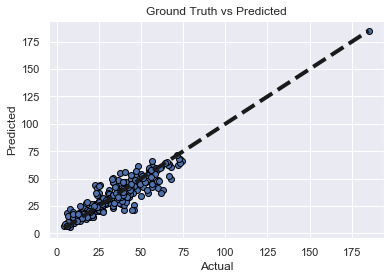

In [88]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [89]:
# Model Performance at 95% confidence level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [90]:
knn = KNeighborsRegressor(n_neighbors= 6, weights= 'distance')

In [91]:
results = cross_val_score(knn, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.86143899 0.62770822 0.86832442 0.72928174 0.27178063 0.79950266
 0.8647245  0.78316044 0.84967776 0.80310523 0.90760506 0.79693402
 0.81627137 0.66616034 0.93627064 0.67109508 0.74266177 0.87395094
 0.73080354 0.9067044 ]
Accuracy: 77.536% (14.262%)


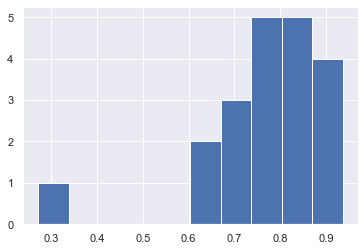

95.0 confidence interval 44.1% and 92.3%


In [92]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [93]:
# Random Forest Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [94]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [95]:
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9883649511472762
0.9399881901079348


In [96]:
model_comparison.loc[len(model_comparison)] = 'Random Forest Regressor', round(rfr.score(X_train, y_train)*100,2), round(rfr.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51
3,Linear Regression (Polynomial = 3),91.12,79.37
4,Decision Tree Regressor,99.63,88.33
5,Decision Tree Regressor (Tuned),96.54,87.26
6,KNN Regressor,89.16,81.52
7,KNN Regressor Tuned,89.16,81.52
8,Random Forest Regressor,98.84,94.00


In [97]:
feature_importances = rfr.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.2311075  0.04325994 0.01079036 0.08854093 0.18270473 0.03760534
 0.03060283 0.37538837]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

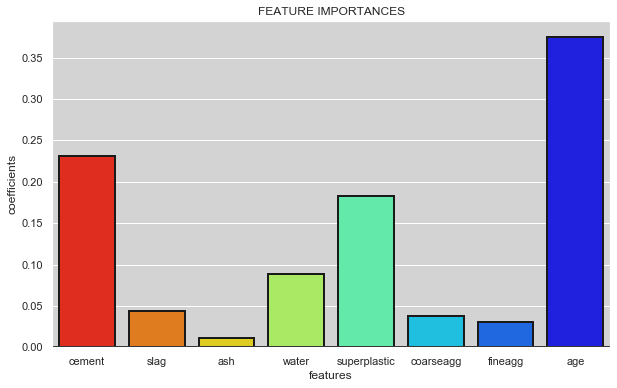

In [98]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(rfr.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

In [99]:
# Tuning
parameters = { 'max_depth': [3,5,7,8,10,15],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30, 50, 70, 80, 100]}
rfrgs = GridSearchCV(RandomForestRegressor(), param_grid = parameters, cv = 10)

In [100]:
rfrgs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [101]:
print(rfrgs.score(X_train, y_train))
print(rfrgs.score(X_test, y_test))

0.9867864755015089
0.9386707213383504


In [102]:
rfrgs.best_params_

{'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [103]:
model_comparison.loc[len(model_comparison)] = 'Random Forest Regressor Tuned', round(rfrgs.score(X_train, y_train)*100,2), round(rfrgs.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51
3,Linear Regression (Polynomial = 3),91.12,79.37
4,Decision Tree Regressor,99.63,88.33
5,Decision Tree Regressor (Tuned),96.54,87.26
6,KNN Regressor,89.16,81.52
7,KNN Regressor Tuned,89.16,81.52
8,Random Forest Regressor,98.84,94.00
9,Random Forest Regressor Tuned,98.68,93.87


In [104]:
# Model Performance at 95% confidence level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [105]:
rfr = RandomForestRegressor(max_depth=15,max_features='log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators= 70, random_state=11)

In [106]:
results = cross_val_score(rfr, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.86961425 0.53663725 0.91961605 0.82153543 0.1909457  0.86022344
 0.93155564 0.80313324 0.90982842 0.88293222 0.93931865 0.7918345
 0.89175894 0.78353356 0.93832046 0.72562373 0.82901508 0.93710524
 0.81727547 0.94983469]
Accuracy: 81.648% (17.170%)


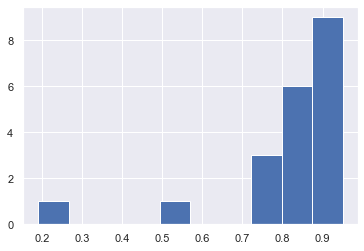

95.0 confidence interval 35.5% and 94.5%


In [107]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [108]:
# Bagging Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [109]:
bagging = BaggingRegressor(random_state = 11)
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=11, verbose=0,
                 warm_start=False)

In [110]:
print(bagging.score(X_train, y_train))
print(bagging.score(X_test, y_test))

0.9850214212970726
0.9325047887141944


In [111]:
model_comparison.loc[len(model_comparison)] = 'Bagging Regressor', round(bagging.score(X_train, y_train)*100,2), round(bagging.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51
3,Linear Regression (Polynomial = 3),91.12,79.37
4,Decision Tree Regressor,99.63,88.33
5,Decision Tree Regressor (Tuned),96.54,87.26
6,KNN Regressor,89.16,81.52
7,KNN Regressor Tuned,89.16,81.52
8,Random Forest Regressor,98.84,94.00
9,Random Forest Regressor Tuned,98.68,93.87


In [112]:
# Bagging Regressor Tunning
parameters ={'n_estimators': [10, 20, 30, 50, 70, 80, 100],
            'max_samples': [0.1, 0.2, 0.5, 1.0],
            'bootstrap': [True, False],
            'bootstrap_features': [True, False]}

In [113]:
bagginggs = GridSearchCV(BaggingRegressor(), param_grid = parameters, cv = 10)
bagginggs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_samples': [0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [10, 20, 30, 50, 70, 80, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [114]:
print(bagginggs.score(X_train, y_train))
print(bagginggs.score(X_test, y_test))

0.9865940157957154
0.9348236081580248


In [115]:
bagginggs.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'max_samples': 1.0,
 'n_estimators': 70}

In [116]:
model_comparison.loc[len(model_comparison)] = 'Bagging Regressor Tuned', round(bagginggs.score(X_train, y_train)*100,2), round(bagginggs.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51
3,Linear Regression (Polynomial = 3),91.12,79.37
4,Decision Tree Regressor,99.63,88.33
5,Decision Tree Regressor (Tuned),96.54,87.26
6,KNN Regressor,89.16,81.52
7,KNN Regressor Tuned,89.16,81.52
8,Random Forest Regressor,98.84,94.00
9,Random Forest Regressor Tuned,98.68,93.87


In [117]:
# Model Performance at 95% confidence level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [118]:
bagging = BaggingRegressor(bootstrap= True,bootstrap_features= False,max_samples= 1.0,n_estimators= 100,random_state = 11)

In [119]:
results = cross_val_score(bagging, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.84766379 0.56416953 0.92801994 0.79935678 0.31254941 0.85271814
 0.91764993 0.82690368 0.87846024 0.86073461 0.92896007 0.80652872
 0.88936523 0.76276321 0.94383979 0.81471137 0.84993563 0.93733687
 0.82604472 0.93115511]
Accuracy: 82.394% (14.384%)


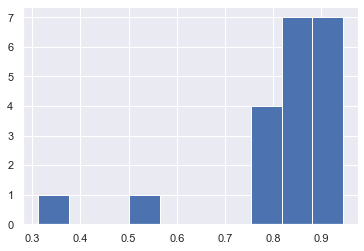

95.0 confidence interval 43.2% and 94.1%


In [120]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [121]:
# Gradient Descent Boosting Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [122]:
gradboost = GradientBoostingRegressor(random_state = 11)
gradboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=11, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [123]:
print(gradboost.score(X_train, y_train))
print(gradboost.score(X_test, y_test))

0.9669748289064259
0.9402944196582662


In [124]:
model_comparison.loc[len(model_comparison)] = 'Gradient Boosting Regressor', round(gradboost.score(X_train, y_train)*100,2), round(gradboost.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51
3,Linear Regression (Polynomial = 3),91.12,79.37
4,Decision Tree Regressor,99.63,88.33
5,Decision Tree Regressor (Tuned),96.54,87.26
6,KNN Regressor,89.16,81.52
7,KNN Regressor Tuned,89.16,81.52
8,Random Forest Regressor,98.84,94.00
9,Random Forest Regressor Tuned,98.68,93.87


In [125]:
feature_importances = gradboost.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.2613422  0.06396319 0.02543576 0.06605262 0.14050339 0.01754976
 0.00795646 0.41719661]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

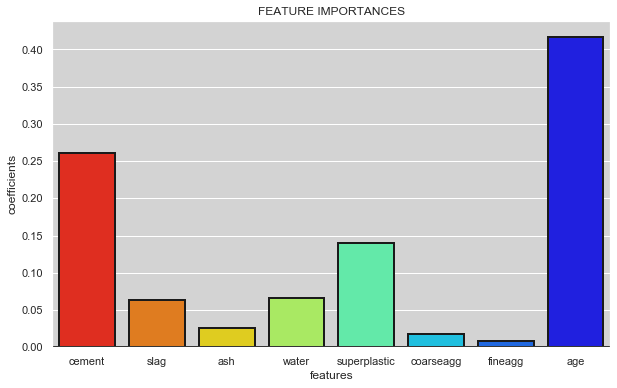

In [126]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(gradboost.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

In [127]:
# Gradient Descent Boosting with Hyperprameter Tuning
parameters = {'n_estimators': [10, 20, 30, 50, 70, 80, 100],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
              'min_samples_split': [1.0, 2, 3, 5, 10],
              'min_samples_leaf': [1, 2, 3, 5, 10],
              'max_depth': [3, 5, 8],
              'max_features': ['log2', 'sqrt'],
              'criterion' : ['friedman_mse', 'mae'],
              'loss' : ['ls', 'lad', 'huber', 'quantile']}

In [128]:
gradboostrs = RandomizedSearchCV(GradientBoostingRegressor(),n_iter = 40, param_distributions = parameters, cv = 10)
gradboostrs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [129]:
print(gradboostrs.score(X_train, y_train))
print(gradboostrs.score(X_test, y_test))

0.987834138141041
0.9541532615706664


In [130]:
gradboostrs.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5,
 'loss': 'ls',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [131]:
model_comparison.loc[len(model_comparison)] = 'Gradient Boosting Regressor Tuned', round(gradboostrs.score(X_train, y_train)*100,2), round(gradboostrs.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51
3,Linear Regression (Polynomial = 3),91.12,79.37
4,Decision Tree Regressor,99.63,88.33
5,Decision Tree Regressor (Tuned),96.54,87.26
6,KNN Regressor,89.16,81.52
7,KNN Regressor Tuned,89.16,81.52
8,Random Forest Regressor,98.84,94.00
9,Random Forest Regressor Tuned,98.68,93.87


In [132]:
# ADA Boosting Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [133]:
adaboost = AdaBoostRegressor(random_state = 11)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=11)

In [134]:
print(adaboost.score(X_train, y_train))
print(adaboost.score(X_test, y_test))

0.8507566445977632
0.8135077902640937


In [135]:
model_comparison.loc[len(model_comparison)] = 'Ada Boosting Regressor', round(adaboost.score(X_train, y_train)*100,2), round(adaboost.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51
3,Linear Regression (Polynomial = 3),91.12,79.37
4,Decision Tree Regressor,99.63,88.33
5,Decision Tree Regressor (Tuned),96.54,87.26
6,KNN Regressor,89.16,81.52
7,KNN Regressor Tuned,89.16,81.52
8,Random Forest Regressor,98.84,94.00
9,Random Forest Regressor Tuned,98.68,93.87


In [136]:
feature_importances = adaboost.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.24336621 0.08096495 0.00798391 0.0873356  0.16945191 0.01334034
 0.02005183 0.37750524]


Text(0.5, 1.0, 'FEATURE IMPORTANCES')

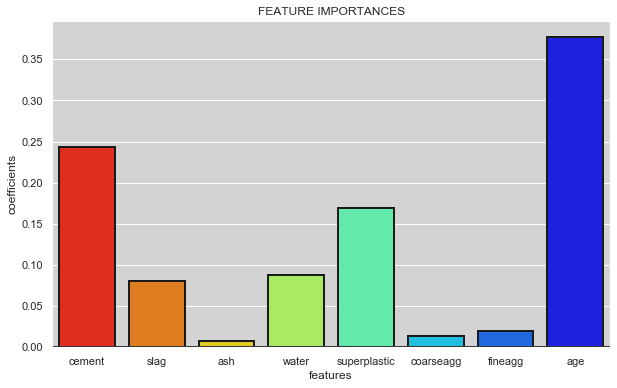

In [137]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(adaboost.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

In [138]:
# ADA Boosting Regressor with Hyper Parameter Tuning
parameters = { 'n_estimators': [30,40,60,70],
 'loss': ['linear','square','exponential'],
  'learning_rate': [1,1.5]}
ada_cv = GridSearchCV(AdaBoostRegressor(), param_grid = parameters, cv = 10)

In [139]:
ada_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [1, 1.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [30, 40, 60, 70]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [140]:
print(ada_cv.score(X_train, y_train))
print(ada_cv.score(X_test, y_test))

0.828005501498122
0.8031123473734038


In [141]:
ada_cv.best_params_

{'learning_rate': 1.5, 'loss': 'square', 'n_estimators': 60}

In [142]:
model_comparison.loc[len(model_comparison)] = 'Ada Boosting Regressor Tuned', round(ada_cv.score(X_train, y_train)*100,2), round(ada_cv.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51
3,Linear Regression (Polynomial = 3),91.12,79.37
4,Decision Tree Regressor,99.63,88.33
5,Decision Tree Regressor (Tuned),96.54,87.26
6,KNN Regressor,89.16,81.52
7,KNN Regressor Tuned,89.16,81.52
8,Random Forest Regressor,98.84,94.00
9,Random Forest Regressor Tuned,98.68,93.87


In [143]:
# Model Performance at 95% confidence level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

In [144]:
adaboost = AdaBoostRegressor(learning_rate= 1.5, loss= 'square', n_estimators= 70,random_state = 11)

In [145]:
results = cross_val_score(adaboost, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[ 0.60804461 -0.63311649  0.83918677  0.84263923  0.23970453  0.68557635
  0.49604207  0.85143671  0.86810209  0.7278355   0.80543009  0.65178473
  0.77544057 -0.00597527  0.88549192  0.73361246  0.78572252  0.45989722
  0.56868489  0.90373603]
Accuracy: 60.446% (36.230%)


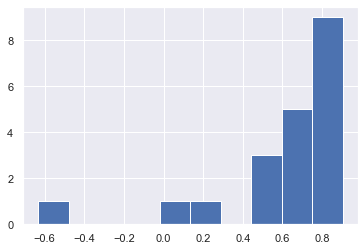

95.0 confidence interval 0.0% and 89.5%


In [146]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [147]:
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,85.89,82.62
1,Linear Regression (Column Drop),83.24,80.20
2,Linear Regression (Polynomial = 2),89.08,82.51
3,Linear Regression (Polynomial = 3),91.12,79.37
4,Decision Tree Regressor,99.63,88.33
5,Decision Tree Regressor (Tuned),96.54,87.26
6,KNN Regressor,89.16,81.52
7,KNN Regressor Tuned,89.16,81.52
8,Random Forest Regressor,98.84,94.00
9,Random Forest Regressor Tuned,98.68,93.87


Gradient Descent Bossting Regressor after Hyper Parameter Tuning seems to be the best model for this dataset.